# Kod do wygenerownia i porównania różnych modeli klasyfikacji (Różne miary)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
np.random.seed = 42

In [2]:
# Wczytanie danych
train_data = pd.read_csv("train_data_with_features.csv")
test_data = pd.read_csv("test_data_with_features.csv")

In [3]:
# Przygotowanie cech i etykiet
y_train = train_data['class']
X_train = train_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"], axis=1)
y_test = test_data['class']
X_test = test_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Zakodowanie etykiet w sposób jednolity
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)  

    # Trening modelu
    model.fit(X_train, y_train_encoded)
    
    # Predykcja na zbiorze treningowym i testowym
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Dokładności
    train_acc = accuracy_score(y_train_encoded, y_train_pred)
    test_acc = accuracy_score(y_test_encoded, y_test_pred)

    # Raporty klasyfikacji
    train_report = classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_.tolist())
    test_report = classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_.tolist())

    # Macierze pomyłek
    train_cm = confusion_matrix(y_train_encoded, y_train_pred)
    test_cm = confusion_matrix(y_test_encoded, y_test_pred)

    # Wypisanie wyników
    print(f"\n📊 Dokładność (trening): {train_acc:.4f}")
    print("Raport klasyfikacji (trening):\n", train_report)

    print(f"\n📊 Dokładność (test): {test_acc:.4f}")
    print("Raport klasyfikacji (test):\n", test_report)

    # Wizualizacja macierzy pomyłek
    plt.figure(figsize=(12, 6))

    # Macierz pomyłek dla zbioru treningowego
    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Macierz Pomyłek - Trening")
    plt.xlabel("Przewidywania")
    plt.ylabel("Rzeczywiste")

    # Macierz pomyłek dla zbioru testowego
    plt.subplot(1, 2, 2)
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Macierz Pomyłek - Test")
    plt.xlabel("Przewidywania")
    plt.ylabel("Rzeczywiste")

    # Wyświetlenie wykresu
    plt.tight_layout()
    plt.show()


## SoftVote Weights

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression( max_iter=1000)
estimators=[('DecisionTree', model1), ('KNN', model2), ('LR', model3)]


📊 Dokładność (trening): 0.9937
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.99      0.99      0.99       680
        Butka Ghevda       1.00      1.00      1.00       680
       Gabara Ghevda       1.00      1.00      1.00       678
             God Wal       0.96      0.99      0.98       680
          Hirva Lamb       1.00      1.00      1.00       680
            Kadu wal       0.99      0.98      0.98       678
            Kala Wal       1.00      1.00      1.00       680
     Lal lamb shenga       1.00      1.00      1.00       680
Lamb Shiracha Ghevda       1.00      1.00      1.00       680
      Shravan Ghevda       1.00      0.98      0.99       679
          Tambda wal       1.00      1.00      1.00       680
       Vatana Ghevda       0.99      0.99      0.99       680

            accuracy                           0.99      8155
           macro avg       0.99      0.99      0.99      8155
    

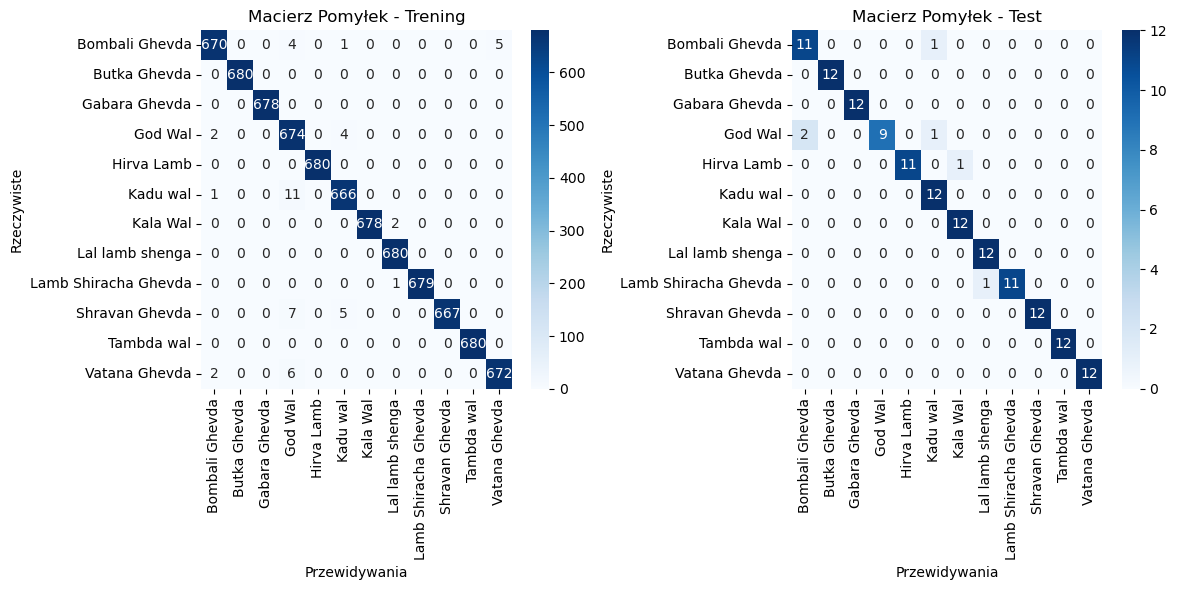

In [6]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
model_soft = VotingClassifier(estimators=estimators, voting='soft', weights=[0.15, 0.65, 0.20])


evaluate_model(model_soft, X_train, X_test, y_train, y_test)

## Stacking

In [7]:
from sklearn.ensemble import StackingClassifier

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📊 Dokładność (trening): 0.9659
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.90      0.88      0.89       680
        Butka Ghevda       1.00      1.00      1.00       680
       Gabara Ghevda       1.00      1.00      1.00       678
             God Wal       0.86      0.89      0.87       680
          Hirva Lamb       0.99      0.96      0.97       680
            Kadu wal       0.95      0.96      0.96       678
            Kala Wal       1.00      0.99      1.00       680
     Lal lamb shenga       0.95      0.97      0.96       680
Lamb Shiracha Ghevda       0.98      0.99      0.98       680
      Shravan Ghevda       0.99      0.96      0.97       679
          Tambda wal       1.00      1.00      1.00       680
       Vatana Ghevda       0.99      0.99      0.99       680

            accuracy                           0.97      8155
           macro avg       0.97      0.97      0.97      8155
    

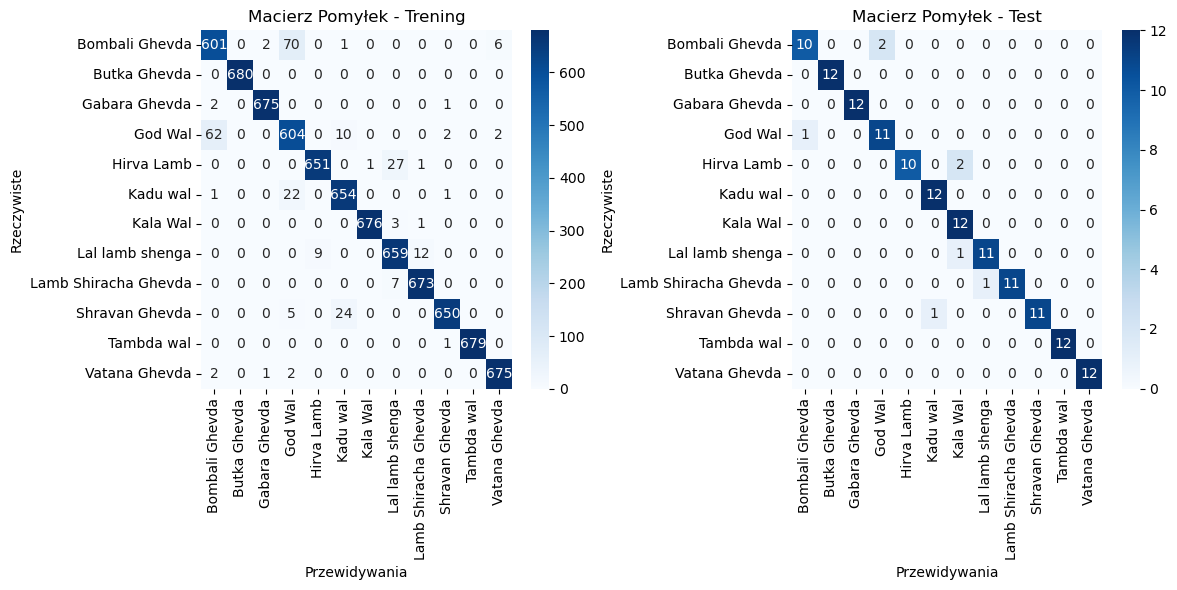

In [8]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

evaluate_model(clf, X_train, X_test, y_train, y_test)

## Bootstrap Aggregating

In [9]:
from sklearn.ensemble import BaggingClassifier


📊 Dokładność (trening): 0.9185
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.84      0.83      0.83       680
        Butka Ghevda       0.98      1.00      0.99       680
       Gabara Ghevda       0.99      0.97      0.98       678
             God Wal       0.83      0.84      0.84       680
          Hirva Lamb       0.94      0.85      0.90       680
            Kadu wal       0.91      0.96      0.93       678
            Kala Wal       0.90      0.93      0.92       680
     Lal lamb shenga       0.87      0.88      0.87       680
Lamb Shiracha Ghevda       0.91      0.94      0.92       680
      Shravan Ghevda       0.99      0.93      0.96       679
          Tambda wal       1.00      1.00      1.00       680
       Vatana Ghevda       0.88      0.89      0.88       680

            accuracy                           0.92      8155
           macro avg       0.92      0.92      0.92      8155
    

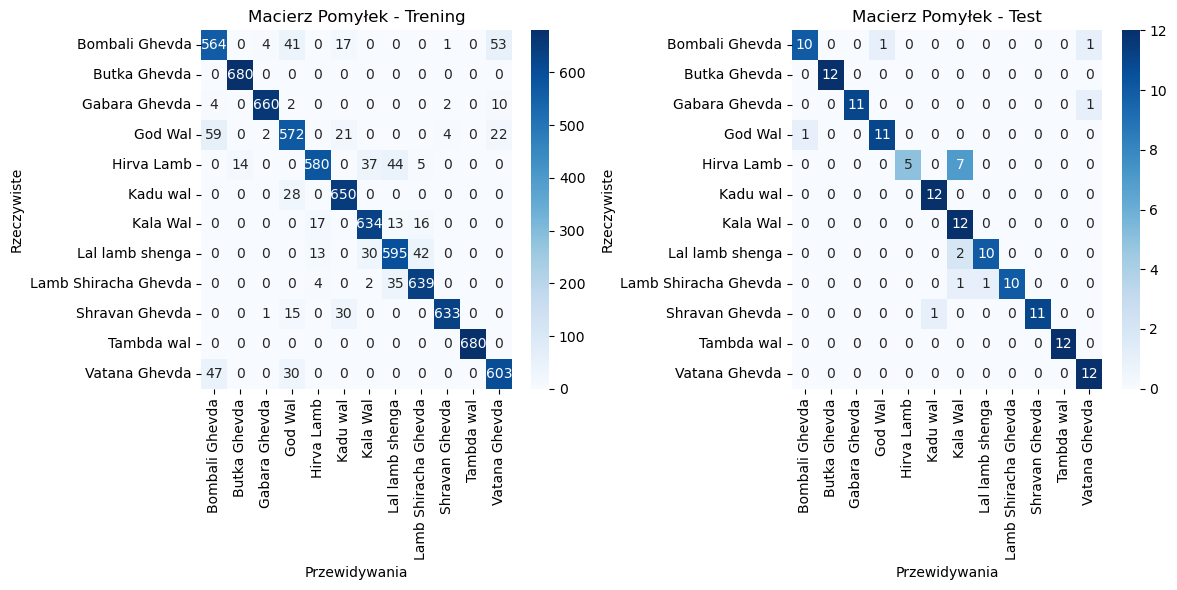

In [10]:
clf = BaggingClassifier(estimator=model3,
                        n_estimators=10)

evaluate_model(clf, X_train, X_test, y_train, y_test)

## Boosting

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr


📊 Dokładność (trening): 0.2440
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.00      0.00      0.00       680
        Butka Ghevda       0.93      0.10      0.18       680
       Gabara Ghevda       0.00      0.00      0.00       678
             God Wal       0.00      0.00      0.00       680
          Hirva Lamb       0.23      0.97      0.37       680
            Kadu wal       0.00      0.00      0.00       678
            Kala Wal       0.12      0.02      0.03       680
     Lal lamb shenga       0.00      0.00      0.00       680
Lamb Shiracha Ghevda       0.00      0.00      0.00       680
      Shravan Ghevda       0.00      0.00      0.00       679
          Tambda wal       0.68      0.84      0.75       680
       Vatana Ghevda       0.17      1.00      0.29       680

            accuracy                           0.24      8155
           macro avg       0.18      0.24      0.13      8155
    

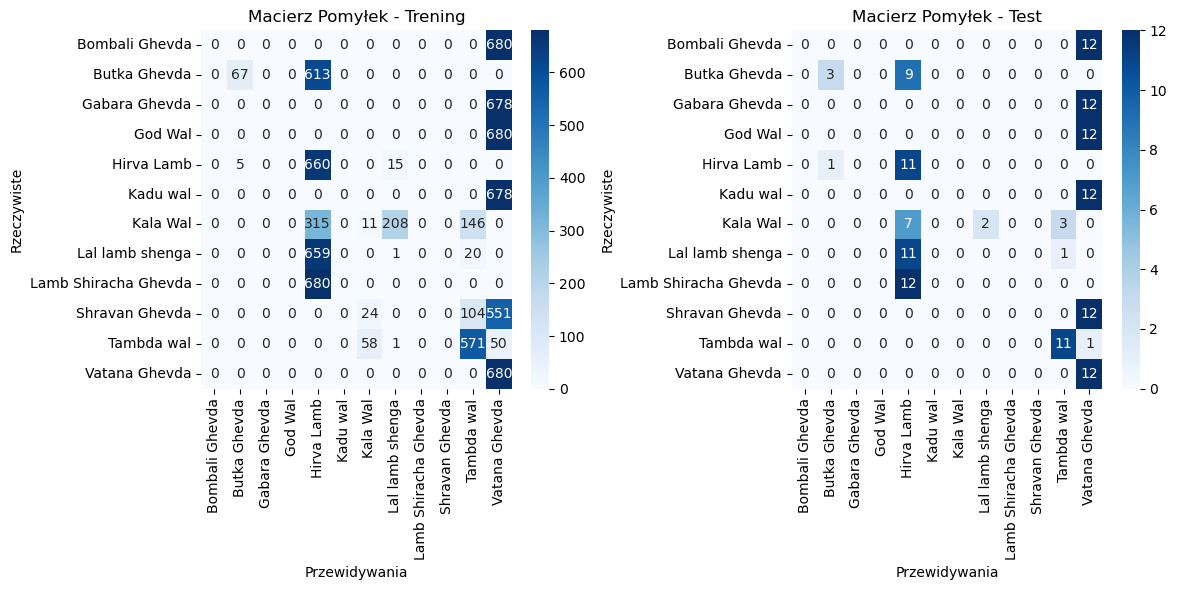

In [11]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

evaluate_model(model, X_train, X_test, y_train, y_test)

## Gradient Boosting


📊 Dokładność (trening): 0.8916
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.83      0.69      0.76       680
        Butka Ghevda       0.96      0.96      0.96       680
       Gabara Ghevda       0.99      0.96      0.97       678
             God Wal       0.67      0.81      0.73       680
          Hirva Lamb       0.92      0.90      0.91       680
            Kadu wal       0.82      0.94      0.88       678
            Kala Wal       0.94      0.92      0.93       680
     Lal lamb shenga       0.82      0.86      0.84       680
Lamb Shiracha Ghevda       0.90      0.89      0.89       680
      Shravan Ghevda       0.96      0.91      0.93       679
          Tambda wal       1.00      0.98      0.99       680
       Vatana Ghevda       0.94      0.88      0.91       680

            accuracy                           0.89      8155
           macro avg       0.90      0.89      0.89      8155
    

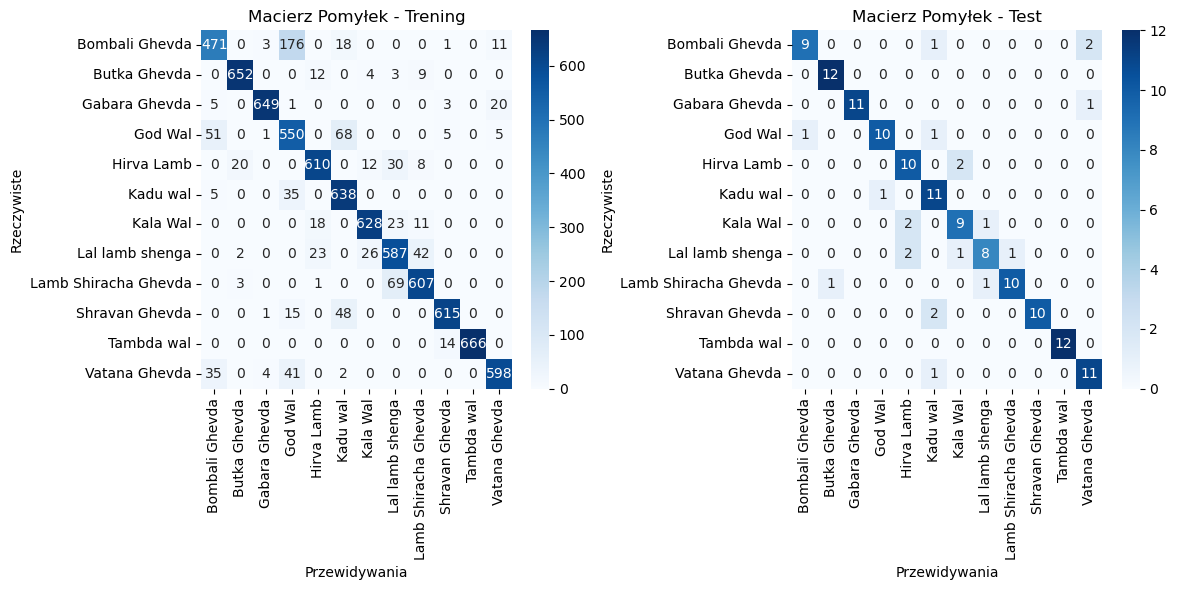

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=1,
                                  learning_rate=0.01) # Szybkość "uczenia" się 

evaluate_model(model, X_train, X_test, y_train, y_test)


📊 Dokładność (trening): 0.9155
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.86      0.69      0.76       680
        Butka Ghevda       0.95      0.98      0.96       680
       Gabara Ghevda       0.97      0.97      0.97       678
             God Wal       0.71      0.84      0.77       680
          Hirva Lamb       0.95      0.89      0.92       680
            Kadu wal       0.85      0.97      0.91       678
            Kala Wal       0.96      0.97      0.96       680
     Lal lamb shenga       0.86      0.95      0.90       680
Lamb Shiracha Ghevda       0.98      0.89      0.94       680
      Shravan Ghevda       0.99      0.93      0.96       679
          Tambda wal       1.00      1.00      1.00       680
       Vatana Ghevda       0.97      0.91      0.94       680

            accuracy                           0.92      8155
           macro avg       0.92      0.92      0.92      8155
    

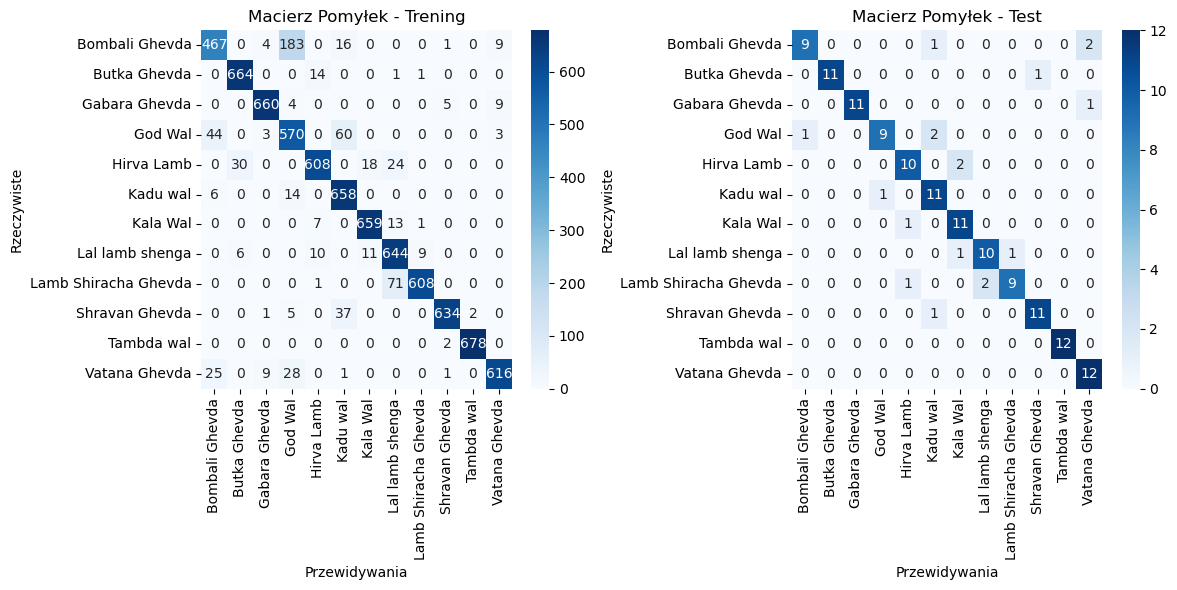

In [13]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Inicjalizacja LabelEncoder
label_encoder = LabelEncoder()

# Zakodowanie etykiet na liczby
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Inicjalizacja modelu XGBClassifier
model = XGBClassifier(random_state=1,
                      learning_rate=0.01, 
                      booster='gbtree', 
                      max_depth=4)


evaluate_model(model, X_train, X_test, y_train, y_test)

In [14]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [15]:
# przygotowanie stacking
def get_stacking():
    
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('cart', DecisionTreeClassifier(random_state=1)))
    level0.append(('rf', RandomForestClassifier(n_estimators=1000, # Ilość słabych estymatorów
                                      max_depth=2, # Maksymalna wysokość drzewa w słabym estymatorze
                                      min_samples_split = 2, # Minimalna ilość obserwacji wymagana do podziału węzła
                                      max_features = 3, # Maksymalna ilość zmiennych brana pod uwagę przy podziale węzła
                                      random_state=0,
                                      n_jobs = -1)))
    level0.append(('aboost', AdaBoostClassifier(random_state=1)))
    level0.append(('gboost', GradientBoostingClassifier(random_state=1,
                                      learning_rate=0.01)))
    level0.append(('xgb', XGBClassifier(random_state=1,
                        learning_rate=0.01, # Szybkość "uczenia" się
                        booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                        max_depth=4 # Maksymalna głębokość drzewa 
                        )))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    
    # definicja meta learner model
    level1 = LogisticRegression()
    
    # definicja stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    
    return model

In [16]:
# lista modeli
def get_models():
    
    models = dict()
    models['lr'] = LogisticRegression()
    models['cart'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier(n_estimators=1000, # Ilość słabych estymatorów
                                      max_depth=2, # Maksymalna wysokość drzewa w słabym estymatorze
                                      min_samples_split = 2, # Minimalna ilość obserwacji wymagana do podziału węzła
                                      max_features = 3, # Maksymalna ilość zmiennych brana pod uwagę przy podziale węzła
                                      random_state=0,
                                      n_jobs = -1)
    models['aboost'] = AdaBoostClassifier(random_state=1)
    models['gboost'] = GradientBoostingClassifier(random_state=1,
                                      learning_rate=0.01)
    models['xgb'] = XGBClassifier(random_state=1,
                        learning_rate=0.01, # Szybkość "uczenia" się
                        booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                        max_depth=4 # Maksymalna głębokość drzewa 
                        )
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()

    return models

In [17]:
# ocena modeli przy wykorzystaniu cross-validation
def evaluate_model(model, X, y):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

    return scores


### uwaga! może zająć dużo czasu

In [18]:
# modele do evaluacji
models = get_models()

# Zakodowanie etykiet na liczby
y_encoded = label_encoder.fit_transform(y_test)
X=X_test

# ocena modeli
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y_encoded)
    results.append(scores)
    names.append(name)
    print('%8s mean-%.3f std-%.3f' % (name, np.mean(scores), np.std(scores)))

      lr mean-0.775 std-0.092
    cart mean-0.699 std-0.097
      rf mean-0.685 std-0.104
  aboost mean-0.139 std-0.005
  gboost mean-0.631 std-0.138
     xgb mean-0.706 std-0.103
     svm mean-0.699 std-0.080
   bayes mean-0.714 std-0.106
stacking mean-0.675 std-0.104


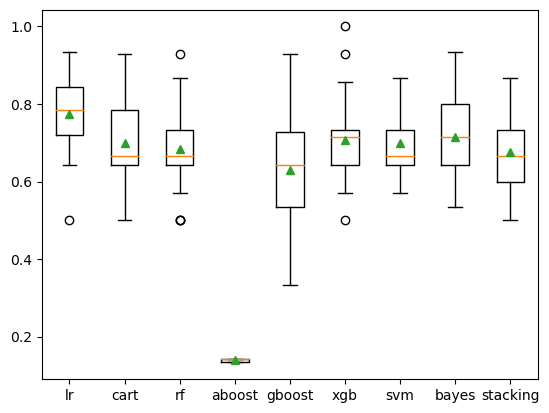

In [19]:
# plot acc dla modeli i stacking
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Do sprawdzenia istotności cech

In [20]:
clf = RandomForestClassifier(n_estimators=100,  max_depth=7)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [21]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Dokładność modelu: {accuracy:.4f}")
print("Raport klasyfikacji:\n", report)

Dokładność modelu: 0.8958
Raport klasyfikacji:
                       precision    recall  f1-score   support

      Bombali Ghevda       1.00      0.75      0.86        12
        Butka Ghevda       1.00      1.00      1.00        12
       Gabara Ghevda       1.00      1.00      1.00        12
             God Wal       0.91      0.83      0.87        12
          Hirva Lamb       0.83      0.83      0.83        12
            Kadu wal       0.71      1.00      0.83        12
            Kala Wal       0.79      0.92      0.85        12
     Lal lamb shenga       0.82      0.75      0.78        12
Lamb Shiracha Ghevda       1.00      0.92      0.96        12
      Shravan Ghevda       1.00      0.83      0.91        12
          Tambda wal       1.00      1.00      1.00        12
       Vatana Ghevda       0.85      0.92      0.88        12

            accuracy                           0.90       144
           macro avg       0.91      0.90      0.90       144
        weighted avg

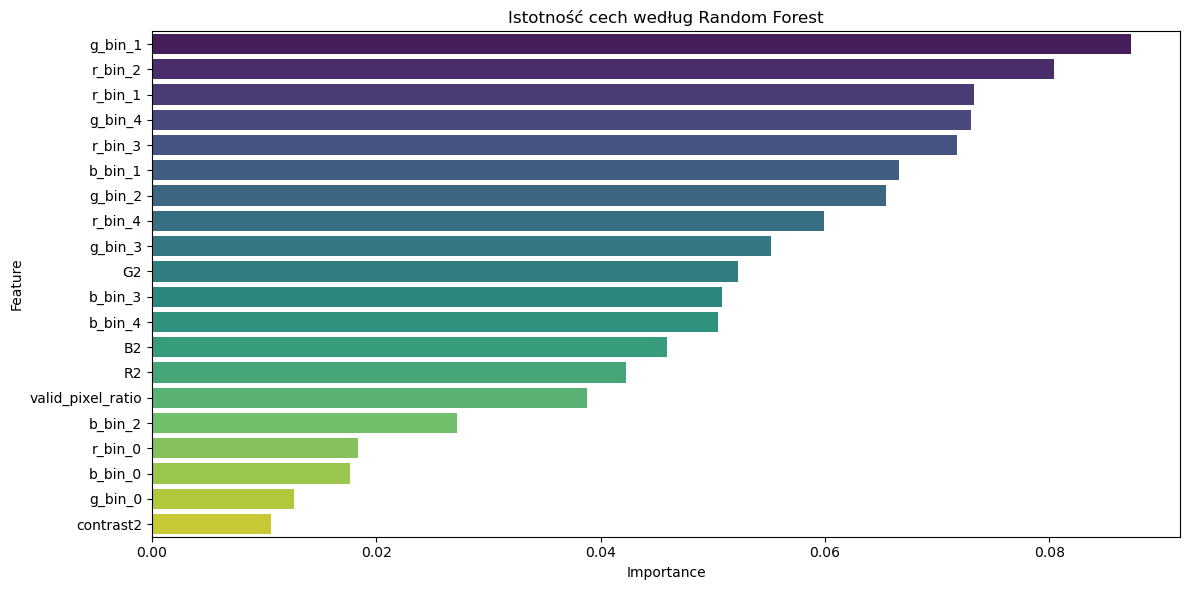

In [22]:
import seaborn as sns
# Tworzymy DataFrame z istotnościami
feature_importance = pd.DataFrame({
    'Feature': train_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"],axis=1).columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Wykres
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Istotność cech według Random Forest')
plt.tight_layout()
plt.show()